## Overview

In this project i use customers data from a European bank. i will compare the performence of different models on this data. The data will be used to predict whether a customers of the bank will churn, If a customers churns, it means thay left the bank and took their business elsewhere.


In [1]:
# import some important libraries and packages

import pandas as pd
import numpy as np

In [2]:
# Load the datasets

df = pd.read_csv("C:/Users/E7440/OneDrive/Desktop/ML _Project_work/ML_projects/datasets/churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA of data

In [3]:
df.shape

(10000, 14)

In [4]:
#check the columns names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From this table, we can confirm that the data has 14 features and 10,000 observations. We also know that nine features are integers, two are floats, and three are strings. Finally, we can tell that there are no null values because there are 10,000 observations, and each column has 10,000 non-null values.

In [6]:
#cheak the misssing values in this datasets
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# how many unique values in this datasets
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Feature selection
it is the process of choosing features to be used for modeling

In [8]:
# Create a new df that drops RowNumber, CustomerId, Surname, and Gender cols
churn_df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


#### Features Extraction


In [9]:
# Create Loyalty variable
churn_df['Loyalty'] = churn_df['Tenure'] / churn_df['Age']

churn_df.head(6)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.046512
5,645,Spain,44,8,113755.78,2,1,0,149756.71,1,0.181818


the new variable appeares as the last column in the updated dataframe

### Feature transformation
Now we will transform our features to get them ready for modelling.
The models we will be building with this data are all classification models, and classification models generally need categorical variables to be encoded. Our dataset has one categorical feature: `Geography`. Let's check how many categories appear in the data for this feature.

In [10]:
# Print unique values of Geography col
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

There are three unique values: France, Spain, and Germany. Encode this data so it can be represented using Boolean features.we will call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied.

In [11]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df= churn_df.astype(int)
churn_df.head(6)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1
5,645,44,8,113755,2,1,0,149756,1,0,0,1


## Check the class balance

Before we begin modeling, let's do a few more things. First, we'll check the class balance of the `Exited` column, our target variable.

In [12]:
# Check class balance
churn_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
# Drop Tenure and Age variables
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0,1,1,1,101348,1,0,0,0
1,608,83807,1,0,1,112542,0,0,0,1
2,502,159660,3,1,0,113931,1,0,0,0
3,699,0,2,0,0,93826,0,0,0,0
4,850,125510,1,1,1,79084,0,0,0,1


# split the data



In [14]:
# import the library
from sklearn.model_selection import train_test_split

# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

In [15]:
#shape of the split datasets
X_train.shape, X_test.shape

((7500, 9), (2500, 9))

# Modeling

In [16]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [17]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Check unique values in predictions
np.unique(y_preds)

array([0])

In [19]:
# Get descriptive stats for data
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,650.528800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.0,0.250900,0.247700
std,96.653299,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.0,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.0,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.0,0.000000,0.000000
50%,652.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.0,0.000000,0.000000
75%,718.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.0,1.000000,0.000000
max,850.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,0.0,1.000000,1.000000


### Scaled data
We'll use a function called MinMaxScaler, which we'll import from the sklearn.preprocessing module. MinMaxScaler normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between

In [20]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [21]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [22]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.797
Precision: 0.503
Recall: 0.306
F1 Score: 0.381


## Evaluation

In [23]:
import matplotlib.pyplot as plt

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

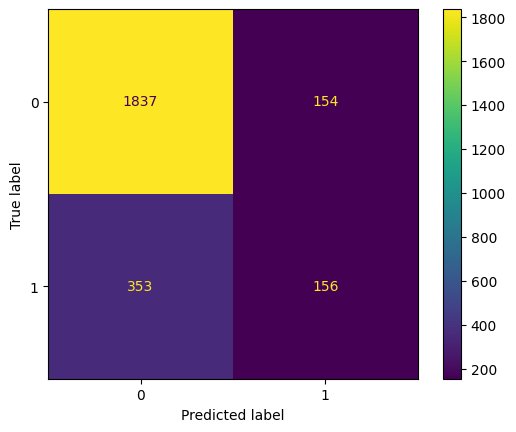

In [24]:
conf_matrix_plot(gnb_scaled, X_test, y_test)